In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Mohanty_IEEE-TCE_2019-Nov_Stress-Lysis.pdf
/kaggle/input/Stress-Lysis.csv
/kaggle/input/readme.docx


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, LSTM, Dense, Dropout, Flatten

2024-06-12 10:24:08.890423: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 10:24:08.890508: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 10:24:09.001930: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
df = pd.read_csv('/kaggle/input/Stress-Lysis.csv')
y = df['Stress Level']
X = df.drop('Stress Level', axis=1)

In [5]:
print(df.describe())

          Humidity  Temperature   Step count  Stress Level
count  2001.000000  2001.000000  2001.000000   2001.000000
mean     20.000000    89.000000   100.141429      1.104448
std       5.777833     5.777833    58.182948      0.771094
min      10.000000    79.000000     0.000000      0.000000
25%      15.000000    84.000000    50.000000      0.000000
50%      20.000000    89.000000   101.000000      1.000000
75%      25.000000    94.000000   150.000000      2.000000
max      30.000000    99.000000   200.000000      2.000000


In [6]:
from keras.layers import Bidirectional, LSTM, Conv1D, MaxPooling1D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',input_shape=(X_train.shape[1], 1),padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=1))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
 
# LSTM layers with dropout
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cnn_lstm_lysis.keras', monitor='val_accuracy', save_best_only=True, mode='max')

In [18]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_test, y_test), callbacks=[early_stopping, model_checkpoint])

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5685 - loss: 0.8874 - val_accuracy: 0.7720 - val_loss: 0.4235
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7252 - loss: 0.5060 - val_accuracy: 0.7604 - val_loss: 0.4307
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7445 - loss: 0.4582 - val_accuracy: 0.7920 - val_loss: 0.3562
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7443 - loss: 0.4523 - val_accuracy: 0.8486 - val_loss: 0.3768
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8281 - loss: 0.3482 - val_accuracy: 0.9800 - val_loss: 0.0932
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9128 - loss: 0.2256 - val_accuracy: 0.9101 - val_loss: 0.1798
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9242 - loss: 0.1717 - val_accuracy: 0.9068 - val_loss: 0.2379
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9270 - loss: 0.1978 - val_accuracy: 0.9850 - val_loss

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0095 
Test Loss: 0.0093
Test Accuracy: 0.9983


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import classification_report

predict_x = model.predict(X_test)
predicted_classes = np.argmax(predict_x, axis=1)
report = classification_report(y_test, predicted_classes)

print(report)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       229
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



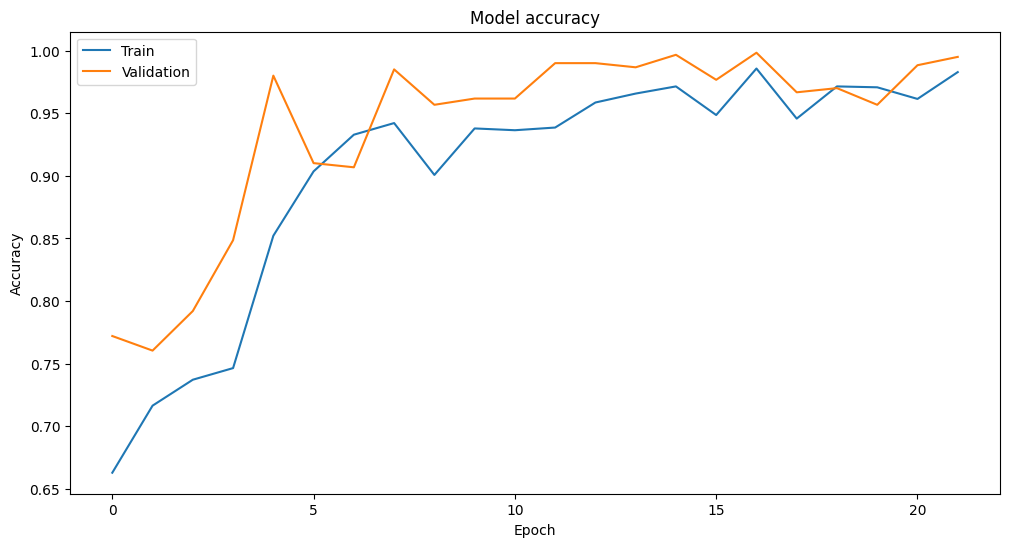

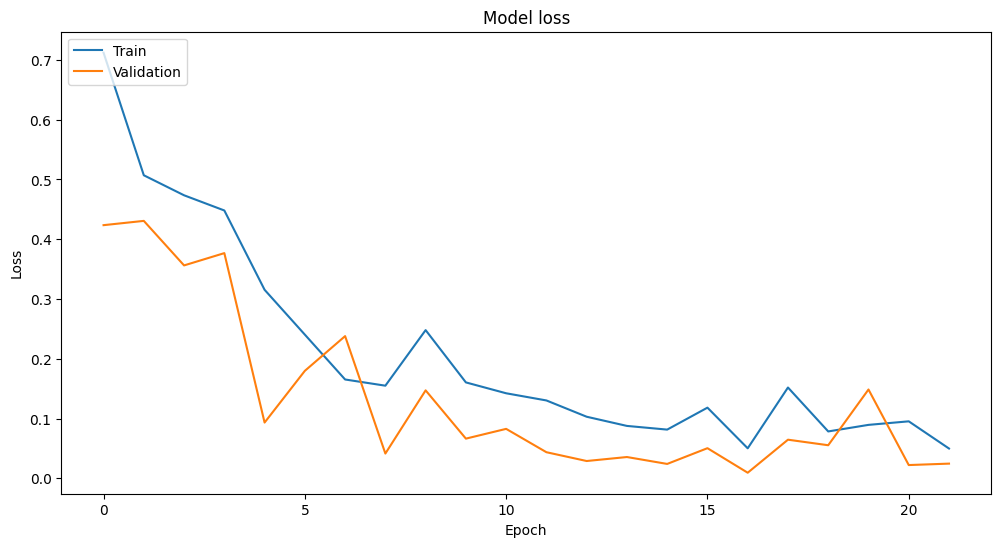

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


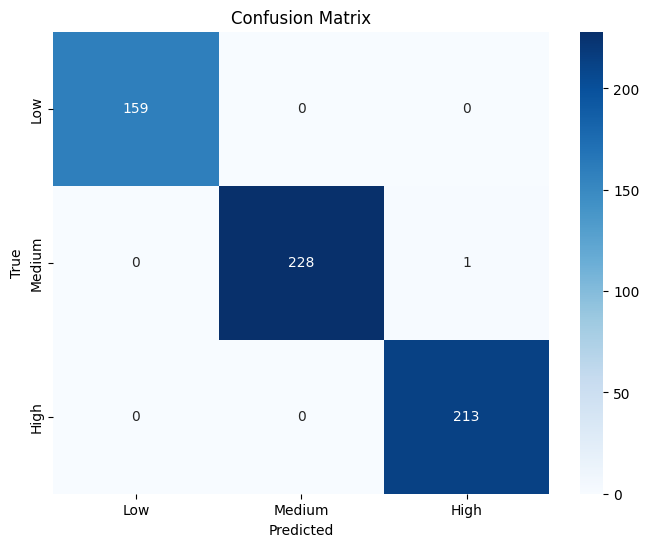

In [22]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
plot_confusion_matrix(y_test, y_pred, classes=['Low', 'Medium', 'High'])

ROC for :



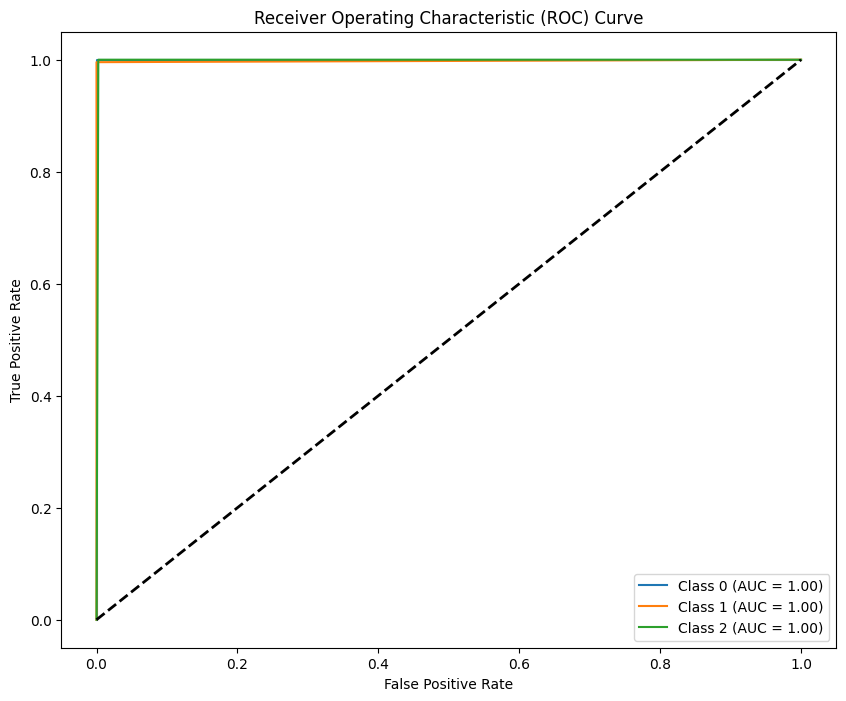

In [23]:
print(f"ROC for :\n")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
n_classes = 3

y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_bin = label_binarize(y_pred, classes=np.arange(n_classes))


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()